# Support Vector Machines

Support vector machines (SVMs) are among the most powerful and commonly used models for supervised classification. Today, we will look at the intuition and mathematics behind SVM classifiers, then use them to solve some classification problems.

## Decision Boundaries and Margins

#### Intuition

Let's look at classification in a simple linearly separable two-class case. When faced with the classification problem, we want to find a "decision boundary" in the input space, where points on one side of the boundary are predicted to be in class A and points on the other side predicted to be in class B. 

https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_(SVG).svg/2000px-Svm_separating_hyperplanes_(SVG).svg.png

One intuitive way to define a decision boundary is to draw the line (H3 in this case) that results in the greatest distance between the points of each class and the decision boundary. The SVM model is based on precisely on this approach, and the SVM is named for the support vector, the inputs for each class that are the closest to the margin. 

#### Mathematics

Given the generic two class classification setup with data $ \{x_n, t_n\}_{n = 1}^N$ where $x_n \in \mathbb{R}^D$ and $t_n \in \{-1, 1\}$, we want to find the optimal weights $w$ and bias $b$ for the model $y(x; w, b) = w^Tx + b$.

To define the concept of the margin mathematically, first notice that $w$ will be orthogonal to the decision boundary, so we can decompose each vector into $x = x_{\perp} + r \frac{w}{||w||_2}$, where the magnitude of $r$ is the margin. Noting that $t_ny(x_n;w, b)$ will always be positive, we can rearrange this decomposition to define the margin for point $x_n$ to be 

$$ r_n = \frac{t_n(w^Tx_n + b)}{||w||_2} $$

The overall margin $r$ is determined by the margins of the support vectors, so 

$$ r = \min_n \frac{t_n(w^Tx_n + b)}{||w||_2}$$


## Margin Maximization and Quadratic Programming

To find the optimal $w$ and $b$ for the SVM model, we want to maximize the expression for $r$ formalized above. This actual optimization of $w$ and $b$ relies on complicated math that isn't crucial to understanding *why* SVMs work.

If you want to know *how* SVMs work, the basic idea is that the process of optimizing $r$ can be expressed as a constrained optimization problem with a form that can be solved with quadratic programming. We can also apply the notion of Lagrangian Duality to this expression for $r$ to obtain a form that allows us to perform the kernel trick, which we will briefly explain.

https://en.wikipedia.org/wiki/Quadratic_programming

http://stats.stackexchange.com/questions/19181/why-bother-with-the-dual-problem-when-fitting-svm

## Kernel Functions

One of the reasons why SVMs can be so powerful is their ability to utilize the kernel trick.

In the Lagrangian optimization of the margin, the solution depends only on the inputs through the term $\phi(x)^T\phi(z)$. A Kernel is defined simply as a function that takes in two vectors of the input space and outputs a scalar representing some similarity metric. 

Specifically, a kernel function $K$ is defined such that $K(x, z) = \phi(x)^T\phi(z)$ for some feature representation $\phi$. 

The power of kernels is that certain feature representations result in kernels that can be expressed in a closed form. For example, the RBF kernel, $K(x, z) = \phi_{RBF}(x)^T\phi_{RBF}(z)$ can be simplified as $K(x, z) = \exp(-||x - z||^2)$. $\phi_{RBF}(x)$ is an infinite dimension feature representation that would be impossible to calculate for each input $x$, but the key here is that *we don't actually have to calculate this feature representation* since we only deal with terms of the form $\phi_{RBF}(x)^T\phi_{RBF}(z)$, which can be computed in a very simple way.

The upshot of all of this is that the kernel trick takes advatnage of the fact that SVMs rely only on a dot product over the feature space, rather than individual feature vectors. This allows us to work with immensely complicated feature representations while keeping the actual computation of the SVM very simple.
       
Once again the mathematics behind the kernel trick isn't crucial to being able to utilize SVMs effectively, it suffices to know that the kernel trick allows SVMs to work with very complicated, even infinite feature representations. However the kernel trick is quite interesting, and there are plenty of resources online that explain them more in depth.
    

## Application

Here's Scikit-learn's example of how to use their SVM implementation, classifying flowers by sepal length and width. First, we load a toy dataset.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

Now, we can fit different SVM models using different kernels.

In [17]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

Then, we can plot the decision boundaries for each of the SVM models that we fitted.

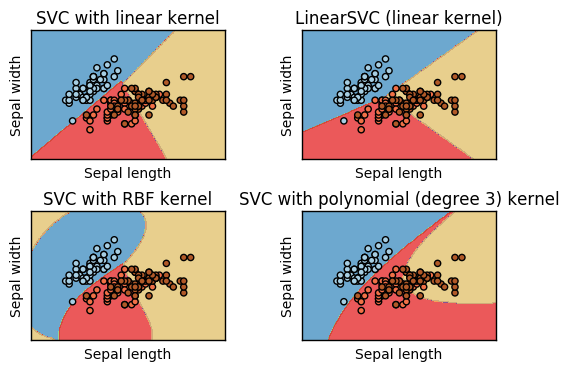

In [18]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Challenge: Digit Recognition Revisited 

As we mentioned, 

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()

The dataset consists of inputs in digits.images, and outputs in digits.target

In [ ]:
plt.gray() 
plt.matshow(digits.images[50]) 
plt.show() 

print(digits.images[50])
print(digits.target[50])